In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#adjust the configuration of the plots we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
#read in the data
df = pd.read_csv('D:\Data Analysis\Kaggle Databases\Kaggle Dataset - Movie Industry\movies.csv')

#look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [8]:
#find missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
#data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#remove .0 from budget and gross
df['budget'] = df['budget'].fillna(0).astype('float64').astype('int64')
df['gross'] = df['gross'].fillna(0).astype('float64').astype('int64')
df['votes'] = df['votes'].fillna(0).astype('float64').astype('int64')

In [12]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [13]:
#correct year column
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime yearcorrect  
0      46998772               Warner Bros.    146.0        1980  
1      58853106          Columbia Pictures    104.0        1980  
2     538375067                  Lucasfilm    124.0        1980  
3      83453539         Paramount Pictures     88.0        1980  
4      39846344             Orion Pictures     98.0        1980  
...         ...                        ...      ...         ...  
7663          0                        NaN     90.0        2020  
7664          0  Cactus Blue Entertainment     90.0        2020  
7665          0           Embi Productions      NaN        2020  
7666          0                        NaN    120.0        2020  
7667          0                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score    votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000   Anthony Russo   
...                                 ...    ...      ...             ...   
1617   January 26, 1990 (United States)    4.5      274     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox    162.0        2009  
7445  2797501328                   Marvel Studios    181.0        2019  
3045  2201647264            Twentieth Century Fox    194.0        1997  
6663  2069521700                        Lucasfilm    138.0        2015  
7244  2048359754                   Marvel Studios    149.0        2018  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        1990  
1614           0                    Allied Vision     85.0        1989  
1606           0  Trans World Entertainment (TWE)     89.0        1989  
1601           0         Budapest Stúdió Vállalat    104.0        1990  
7667           0                      PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [15]:
#show all rows
pd.set_option('display.max_rows', None)

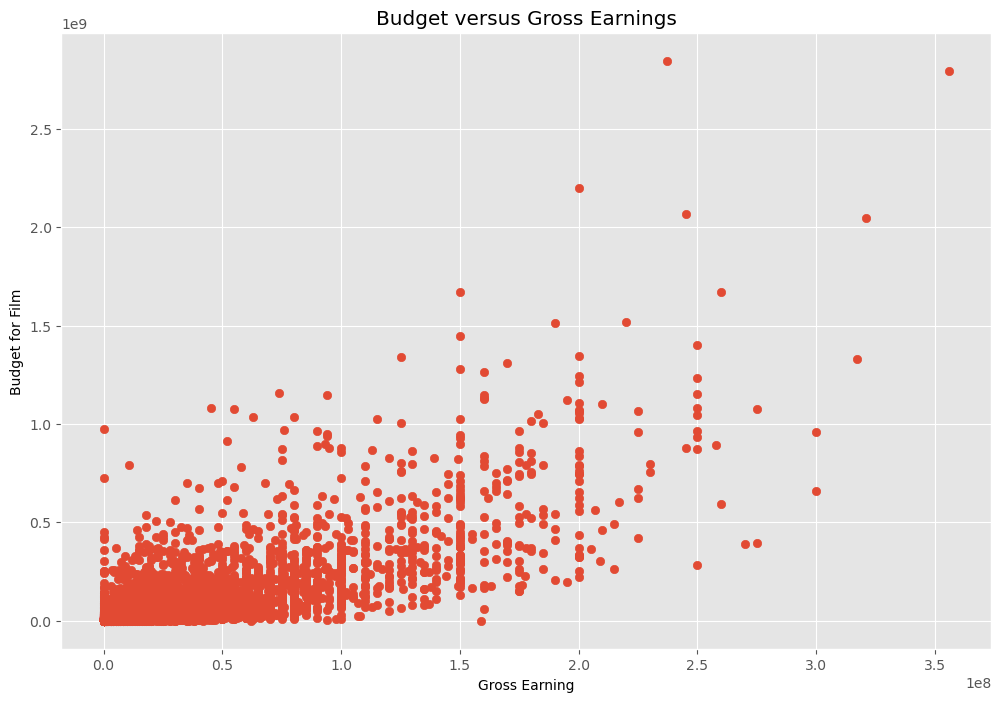

In [16]:
#Possible gross correlations
#budget high correlation
#famous company high correlation

#scatterplot budget x gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget versus Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

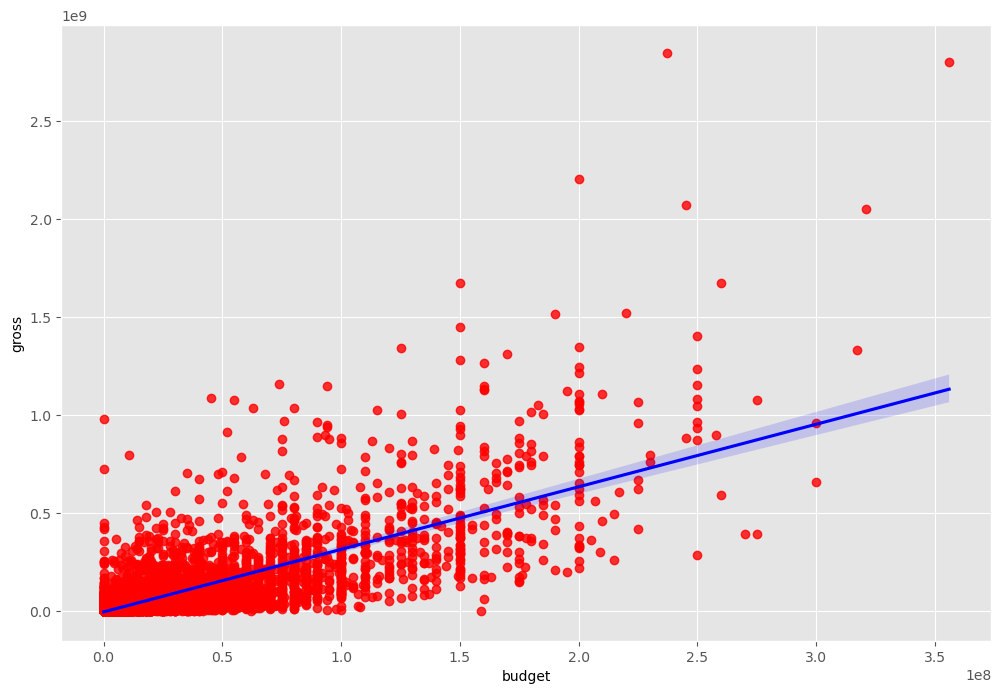

In [17]:
#Plot budget x gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [18]:
#Correlation methods: pearson, kendall, spearman
#df.corr()
df.corr(method='pearson')
#budget x gross Correlation = 0.75 HIGH CORRELATION

C:\Users\bruno\AppData\Local\Temp\ipykernel_12364\4234342805.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222427  0.409182  1.000000  0.486931  0.632870  0.309122
budget   0.309212  0.055665  0.486931  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632870  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309122  0.269510  0.245235  1.000000

C:\Users\bruno\AppData\Local\Temp\ipykernel_12364\1555582027.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


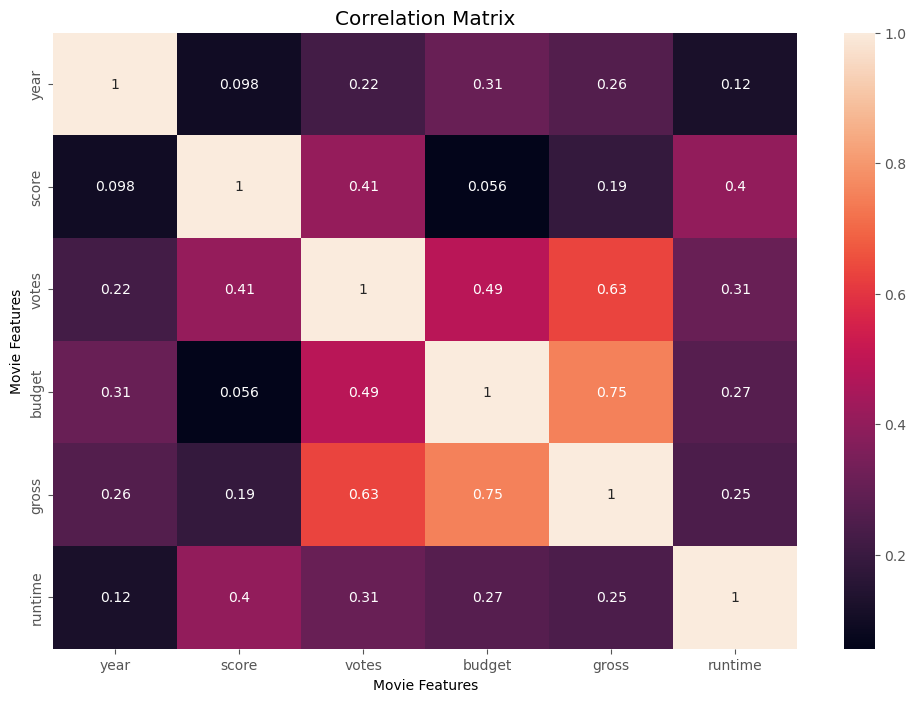

In [19]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
#analyzing the companies
#turning company names into diferrent numbers to analyse
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000      2589    4014   
1     5573       6      1  1980      1492    5.8    65000      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000      1111    2567   
3      286       4      4  1980      1492    7.7   221000      1301    2000   
4     1027       6      4  1980      1543    7.3   108000      1054     521   
5     2109       6     10  1980      2502    6.4   123000      2528    4362   
6     5574       6      0  1980      1771    7.9   188000      1412     838   
7     4436       6      3  1980       699    8.2   330000      1829    1769   
8     5281       4      0  1980      1753    6.8   101000      2306    1979   
9     6213       6      3  1980      2286    7.0    10000      2864     423   
10     463       4      0  1980       674    6.1    18000       357    3985   
11    5920       4      1  1980      2987    7.3    54000      1199    1832   
12    4315       4      1  1980       626    5.3    30000      2352    2333   
13    4084       6      6  1980      3211    7.7    49000      2388    2327   
14    1687       6      5  1980      1543    7.1    37000       318     520   
15    5024       4      6  1980      3021    7.2    27000      1243    3548   
16    1900       6      6  1980      2286    6.6    21000        49     735   
17      92       4      4  1980       699    6.9    29000       514    3262   
18    5865       6     10  1980      1108    6.8    66000      1374    2104   
19    5189       6      4  1980       626    6.8    26000      2561     556   
20    1387       6      5  1980       945    6.5    20000      2891    4451   
21    2451       6      1  1980       160    6.8    14000      1892    2926   
22    5845       4      0  1980       281    6.7    22000       744    4192   
23    7445       4      8  1980       585    5.3    12000      2371    3528   
24    7127       4      6  1980      1913    6.4    14000      1153      12   
25     346       6     10  1980       773    6.9    33000      1583    3234   
26    3263       6      4  1980      2059    6.5     5100      2433    2483   
27    4442       4      0  1980       281    5.0     4100      1282      33   
28     980       6      5  1980      1771    7.2    17000      2673    4386   
29     362       6      5  1980       886    6.2    22000      2151    3326   
30    3796       4      4  1980      3296    7.1     8900      2811      83   
31    4373       6     10  1980      1467    5.4    16000      2143    4455   
32    4987       4      0  1980       342    5.3    15000      1041    1587   
33    1103       4      6  1980       160    6.1      604      1644     958   
34    4785       4      4  1980       699    6.7     9100      1225    3136   
35    4362       6      4  1980      2818    6.2    24000      1091    3107   
36    6008       6      4  1980      2452    6.3     4300       855    1358   
37    3721       6      4  1980      2965    6.0    11000      1598    3642   
38    6102       4      6  1980       699    5.9     4000      2296    3826   
39    1244       4      3  1980      2195    7.5    17000      1884    4201   
40    6748       4      7  1980      3101    6.3     5700      1403     518   
41     927       4      6  1980      1588    7.9    13000       335    2252   
42    6644       6      0  1980      1836    7.1     9000      2314    2543   
43    7305       6      3  1980       169    6.6    11000       186    1682   
44    5504       6     10  1980      3042    4.8     2000      1978     151   
45    1152       6      4  1980      1467    6.1    12000      2804    4298   
46    6094       6      0  1980      1705    5.3     3900      1934    3357   
47    5578       6     10  1980      2775    4.6     3900      2836    4344   
48    6360       4      0  1980      2502    5.1     3100       509    2893   
49    3253       4      3  1980      2287    8.3    1500

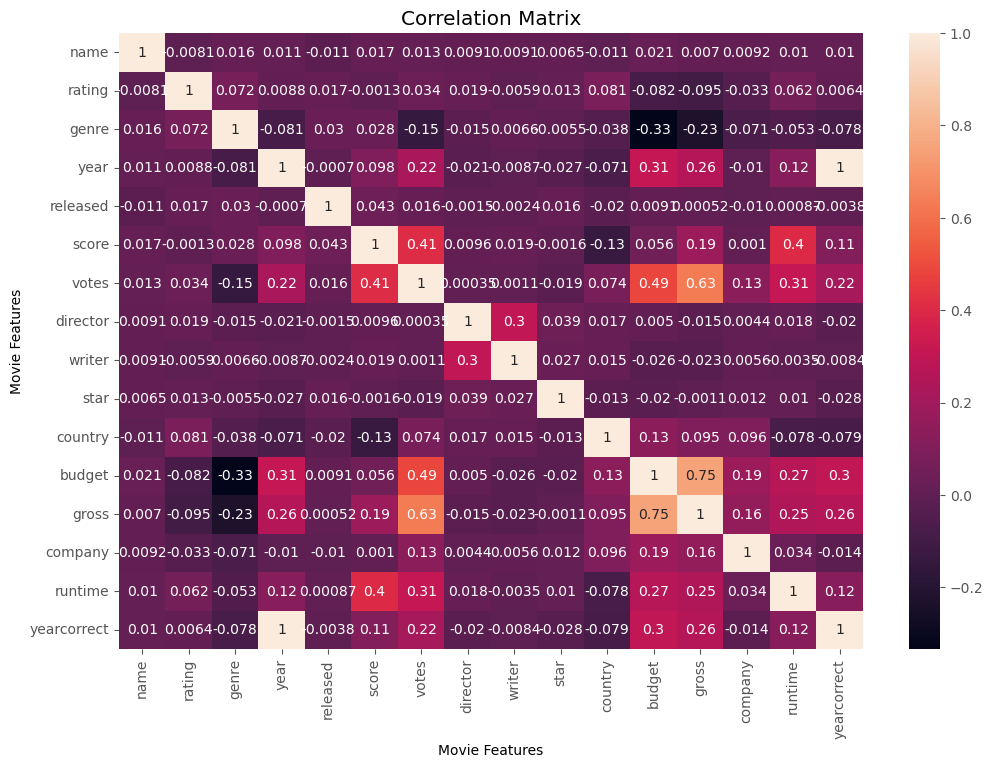

In [21]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect  0.010225  0.006403 -0.078210  0.996397 -0.003775  0.106295   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309122  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect  0.217782 -0.020385 -0.008391 -0.027606 -0.079009  0.300236   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.010392     0.010225  
rating      -0.095450 -0.032943  0.062145     0.006403  
genre       -0.234297 -0.071067 -0.052711    -0.078210  
year         0.261900 -0.010431  0.120811     0.996397  
released     0.000519 -0.010474  0.000868    -0.003775  
score        0.186392  0.001030  0.399451     0.106295  
votes        0.632870  0.133457  0.309122     0.217782  
director    -0.014916  0.004404  0.017624    -0.020385  
writer      -0.022997  0.005646 -0.003511    -0.008391  
star        -0.001129  0.012442  0.010174    -0.027606  
country      0.095325  0.095548 -0.078412    -0.079009  
budget       0.750157  0.186474  0.269510     0.300236  
gross        1.000000  0.156745  0.245235     0.255130  
company      0.156745  1.000000  0.034402    -0.014144  
runtime      0.245235  0.034402  1.000000     0.120636  
yearcorrect  0.255130 -0.014144  0.120636     1.000000

In [23]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [25]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.996397
year         yearcorrect    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [26]:
#Gross and Votes is High Correlation
#Gross and Budget is High Correlation
#Gross and Company is Low Correlation